# Country Clustering
- Cluster analysis is a multivariate statistical technique that groups observations on the basis some of their features or variables they are described by
- The goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters
  
Classification VS Clustering :
- Classification is supervised learning which predicting an output category, given input data, then used to predict future outcomes
- Clustering is unsupervised learning which grouping data points together based on similarities among them and difference from others

KMeans Cons & Solution :
- We need to pick K ==> use The Elbow Method
- Sensitive to initialization ==> use sklearn because already init kmeans++
- Sensitive to outliers ==> remove outliers
- Produce spherical solution
- Standardization

Types of clustering :
- Flat ==> KMeans
- Hierarchical ==> Dendogram

In [1]:
from IPython.display import Image

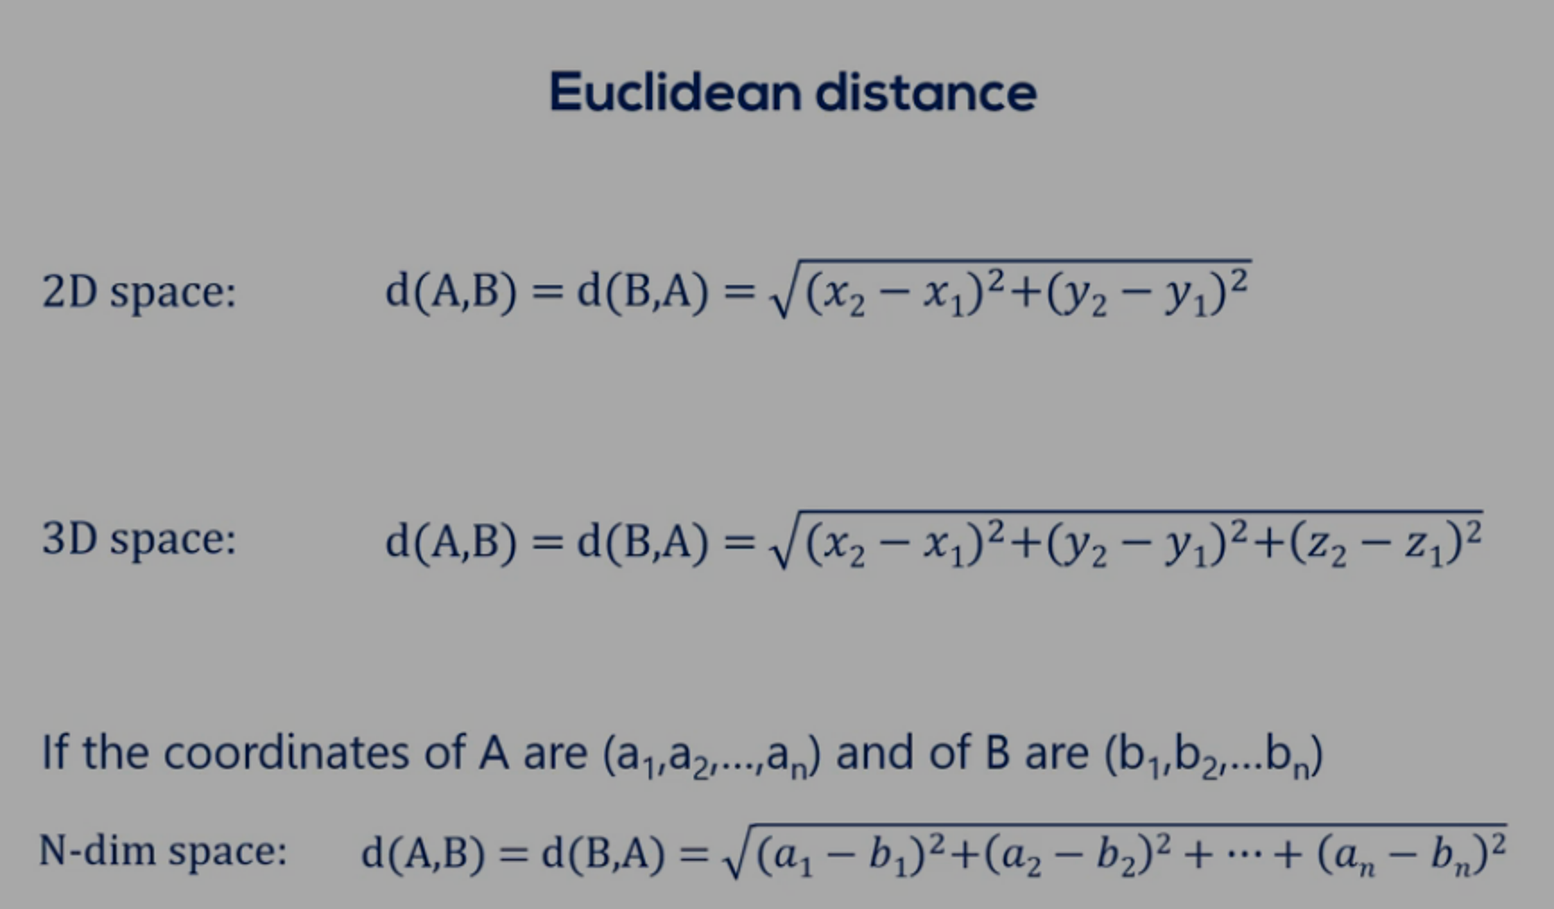

In [9]:
Image(filename= 'image/Euclidean distance.png', width = 500, height=100)

- When performing clustering, we'll be finding the distance between clusters
- In the next section this will be a central notion
- Centroid = the mean position of group of points (aka center of mass)

## Simple K-Means Clustering
Step :
1. choose the number of cluster ==> 'K' stands for the number of cluster
2. specify the cluster seed ==> seed is basically starting centroid
3. assign each point on the graph to a seed ==> we can colour all the points based on their Euclidean distance
4. adjust the centroid  
  
*) iterative process at 3 & 4

## Load Data

In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import KMeans
from sklearn.cluster import KMeans

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [11]:
#load data
data = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S38_L255/3.01. Country clusters.csv')

In [12]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


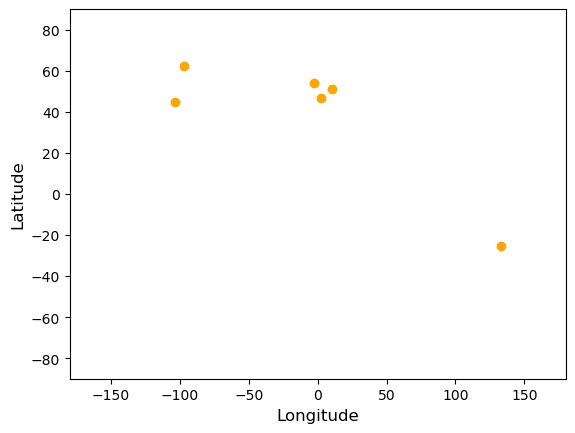

In [16]:
#plot data using scatter plot
plt.scatter(data['Longitude'], data['Latitude'], c='orange')

#set xlim, ylim
plt.xlim(-180, 180)
plt.ylim(-90, 90)

#set label
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

## Select The Feature

In [17]:
#select only latitude and longitude
#iloc = integer-location based indexing ==> select rows and columns by their integer indices
#[:, 1:3] ==> : = select all rows, 1:3 = select columns with integer indices 1 up to (but not including) 3

x = data.iloc[:, 1:3]

In [18]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering
- Init KMeans must KMEans++, and KMeans sklearn already init KMEans++
- KMeans sensitive to outliers

In [19]:
#Set K = the number of clusters
kmeans = KMeans(3)

In [20]:
#fit input data
kmeans.fit(x)

C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
#predicted cluster
identified_cluster = kmeans.fit_predict(x)
identified_cluster

C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 0, 0, 0, 2])

In [22]:
#copy data
data_with_cluster = data.copy()

In [23]:
data_with_cluster.head(1)

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English


In [24]:
#add column Cluster
data_with_cluster['Cluster'] = identified_cluster

In [25]:
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


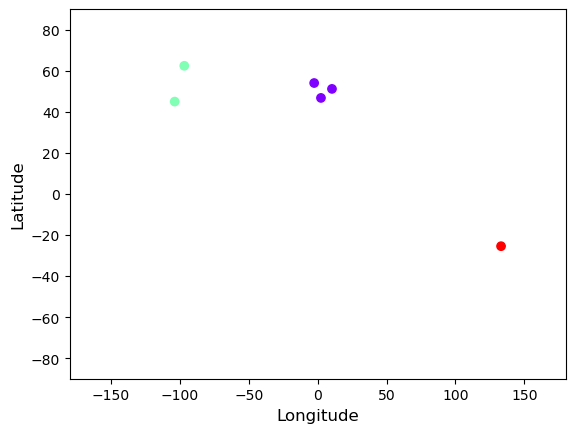

In [34]:
#scatter plot longitude, latitude
#c (color) is an argument which could be coded with a variable 
#cmap https://matplotlib.org/users/colormaps.html
plt.scatter(x = data_with_cluster['Longitude'], 
            y = data_with_cluster['Latitude'], 
            c = data_with_cluster['Cluster'],
            cmap = 'rainbow')

#set xlim, ylim
plt.xlim(-180, 180)
plt.ylim(-90, 90)

#set label
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

## Clustering Categorical Data
Clustering country based on their language

### Map the Data

In [36]:
#copy data
data_mapped = data.copy()

#map data
data_mapped['Language'] = data_mapped['Language'].map({'English':0,
                                                      'French':1,
                                                      'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [41]:
#select column latitude, longitude, language
#iloc = integer-location based indexing ==> select rows and columns by their integer indices
#[:, 1:4] ==> : = select all rows, 1:4 = select columns with integer indices 1 up to (but not including) 4

x = data_mapped.iloc[:, 1:4]

In [42]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [43]:
#Set K = the number of clusters
kmeans = KMeans(2)

In [44]:
#fit input data
kmeans.fit(x)

C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [45]:
#predicted cluster
identified_cluster = kmeans.fit_predict(x)
identified_cluster

C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0])

In [46]:
#copy data
data_with_cluster = data.copy()

#add column Cluster
data_with_cluster['Cluster'] = identified_cluster

data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


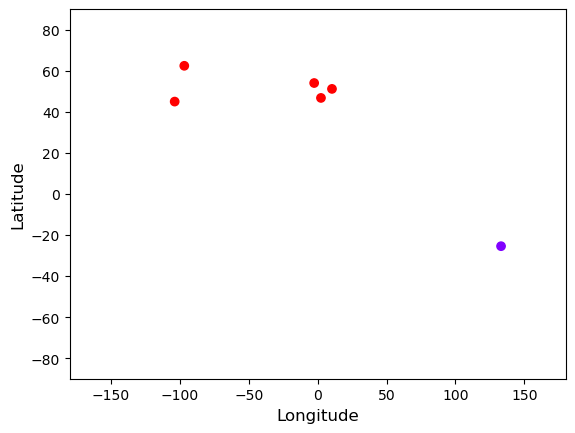

In [47]:
#scatter plot longitude, latitude
#c (color) is an argument which could be coded with a variable 
#cmap https://matplotlib.org/users/colormaps.html
plt.scatter(x = data_with_cluster['Longitude'], 
            y = data_with_cluster['Latitude'], 
            c = data_with_cluster['Cluster'],
            cmap = 'rainbow')

#set xlim, ylim
plt.xlim(-180, 180)
plt.ylim(-90, 90)

#set label
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.show()

## Selecting the number of cluster
Clutersing is about :
- minimizing the distance between points in a cluster
- maximizing the distance between clusters  
  
 distance between points in a cluster ==> WCSS (Within Cluster Sum of Squares)
 - If we minimize WCSS, we have reached the perfect clustering solution  
   
 But there's problem:
 - observation: 1,000, cluster = 1,000, WCSS=0 (min)
 - observation: 1,000, cluster = 1 WCSS= max    
 
 What we want :
 WCSS middle Ground ==>  - observation: N, cluster = small, WCSS= low ==> Elbow Method  
 **Elbow Method** ==> the biggest number of clusters for which still getting significant decrease in WCSS  
   
 **Elbow Method**, need 2 information:
 - number of clusters (K)
 - WCSS

### WCSS (Within-Cluster Sum of Squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.  

In [52]:
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [51]:
#get WCSS for current solution K=2
kmeans.inertia_

13208.958119999996

In [53]:
#try & error WCSS 
wcss = []

#create all possible cluster & get WCSS
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [54]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

The sequence is decreasing with very big leaps in the first 2 steps

### The Elbow Method

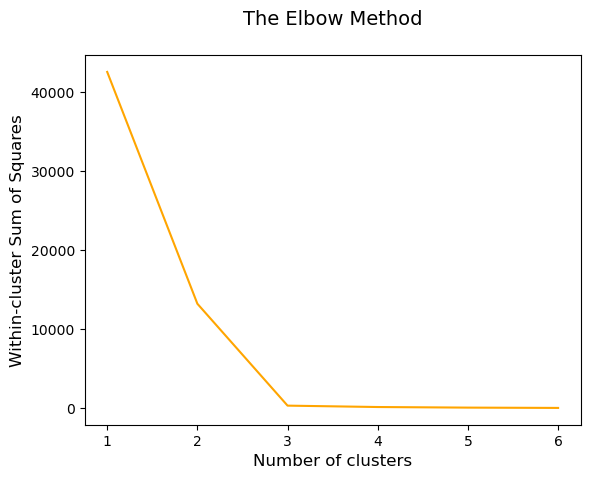

In [55]:
#create possible number of cluster
number_clusters = range(1,7)

#plot elbow
plt.plot(number_clusters, wcss, c='orange')

#title
plt.title('The Elbow Method\n', fontsize=14)

#set label
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares', fontsize=12)

plt.show()

- 3 cluster is the best solution
- 2 cluster solution would be suboptimal as the leap from 2 to 3 is very big in terms of WCSS

## Heatmap & Dendogram

In [5]:
#load scaled data
#this dataset is already being standardized
data2 = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S39_L271/Country clusters standardized.csv')

In [6]:
data2

,Country,Latitude,Longitude,Language
0,USA,0.186540,-1.089160,0
1,Canada,0.728588,-1.008604,0
2,France,0.241895,0.137900,1
3,UK,0.467671,0.080922,0
4,Germany,0.378729,0.230360,2
5,Australia,-2.003422,1.648581,0


In [12]:
#copy dataset
x_scaled = data2.copy()

#drop unnecessary feature ==> language
x_scaled = x_scaled.drop(['Language'],axis=1)

In [13]:
x_scaled

,Country,Latitude,Longitude
0,USA,0.186540,-1.089160
1,Canada,0.728588,-1.008604
2,France,0.241895,0.137900
3,UK,0.467671,0.080922
4,Germany,0.378729,0.230360
5,Australia,-2.003422,1.648581


In [15]:
#set country as index
#because in clustermap, 'Country' couldn't be processed
x_scaled.set_index('Country', inplace=True)

In [17]:
x_scaled

,Latitude,Longitude
Country,,
USA,0.186540,-1.089160
Canada,0.728588,-1.008604
France,0.241895,0.137900
UK,0.467671,0.080922
Germany,0.378729,0.230360
Australia,-2.003422,1.648581


<Figure size 500x400 with 0 Axes>

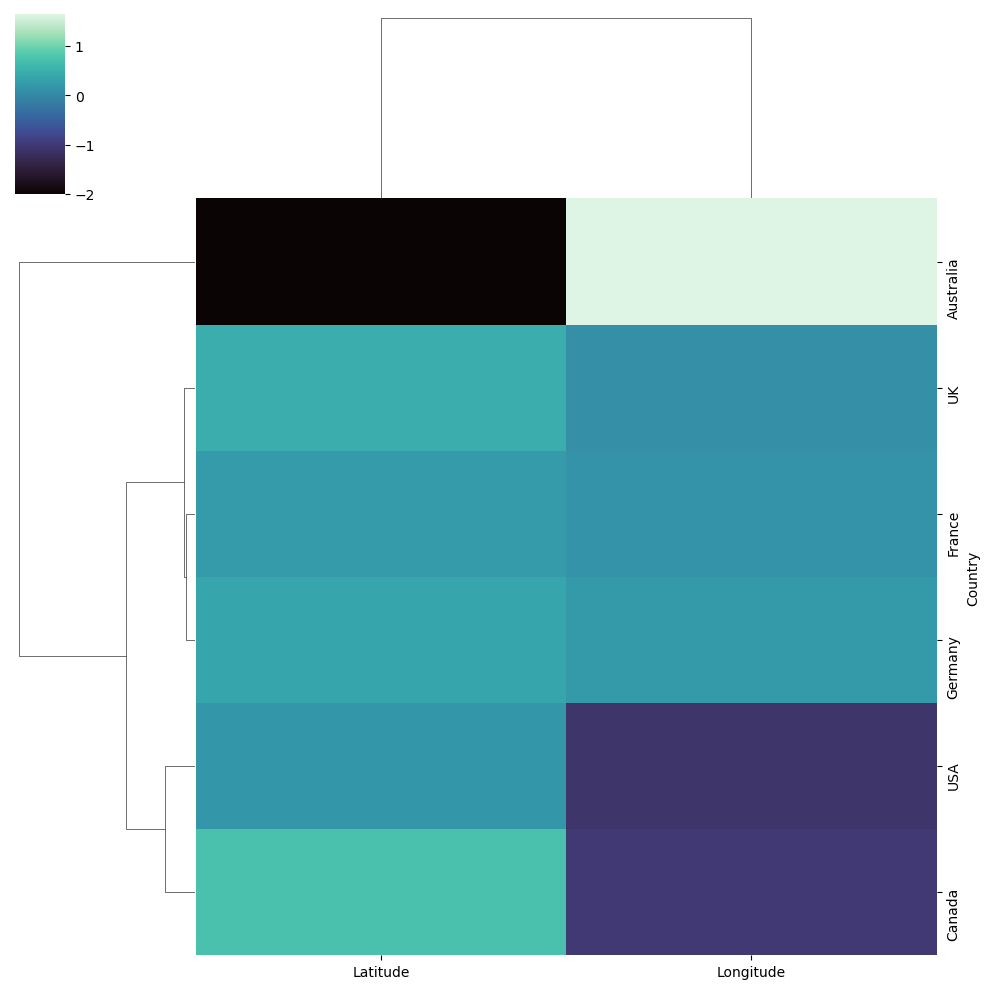

In [19]:
#with 'clustermap' we've got heatmap and dendrogram
sns.clustermap(x_scaled, cmap='mako')

There are 2 features :
- Latitude
- Longitude  
  
There are 6 observations :
- Australia
- UK
- France
- Germany
- USA
- Canada  
  
**Insight :**
- In terms of Latitude, only Australia has different color (dark blue), because other country is located in Northern Hemisphere, while Australia is located in Southern Hemisphere
- Germany, France, and UK has similar color ==> cluster 1
- USA, and Canada has similar color in terms of longitude, and slight difference on latitude ==> cluster 2
- Australia is compeletely different in both latitude and longitude => cluster 3